# TASK_1 - Iris Flower Classification 

## Project Summary -
### Project Description:

#### The Iris Flower Classification project focuses on developing a machine learning model to classify iris flowers into their respective species based on specific measurements. Iris flowers are classified into three species: setosa, versicolor, and virginica, each of which exhibits distinct characteristics in terms of measurements.

### Objective:

#### The primary goal of this project is to leverage machine learning techniques to build a classification model that can accurately identify the species of iris flowers based on their measurements. The model aims to automate the classification process, offering a practical solution for identifying iris species.

### Key Project Details:

#### - Iris flowers have three species: setosa, versicolor, and virginica.
#### - These species can be distinguished based on measurements such as sepal length, sepal width, petal length, and petal width.
#### - The project involves training a machine learning model on a dataset that contains iris flower measurements associated with their respective species.
#### - The trained model will classify iris flowers into one of the three species based on their measurements


##  Let's Begin !

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [8]:
df=pd.read_csv(r"C:\Users\HP\Documents\CodeAlpha projects\Iris Flower Classification\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#drop the extra column
df=df.drop(columns=['Id'])
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#to check basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#display no.of samples in each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Preprocess the dataset

In [10]:
#check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

<Axes: >

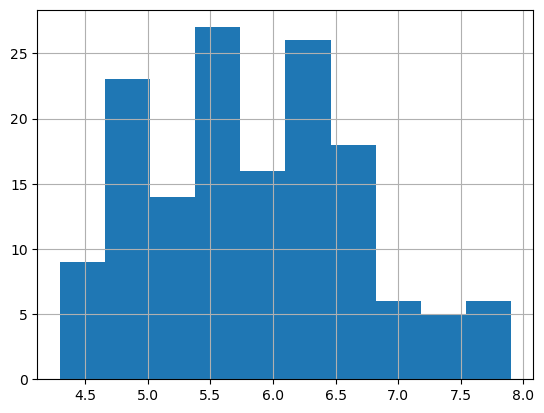

In [12]:
#histograms
df['SepalLengthCm'].hist()

<Axes: >

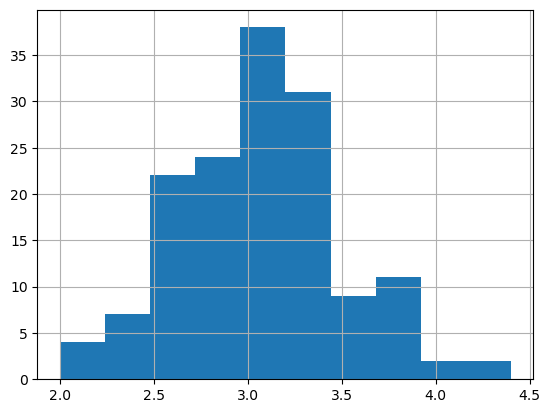

In [13]:
  df['SepalWidthCm'].hist()

<Axes: >

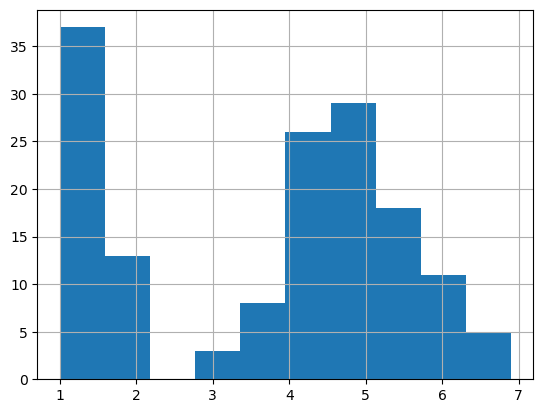

In [14]:
 df['PetalLengthCm'].hist()

<Axes: >

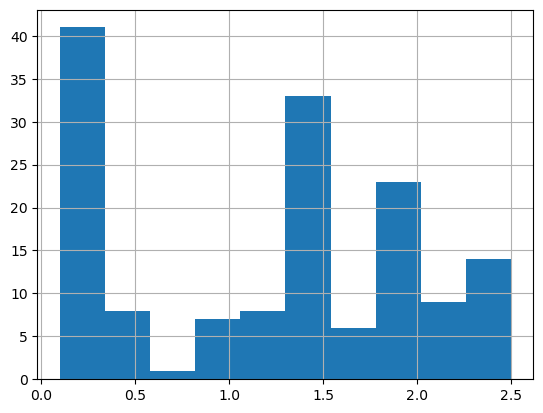

In [15]:
 df['PetalWidthCm'].hist()

In [17]:
#scatterplot
colors=['red','orange','blue']
Species=['Iris-setosa','Iris-versicolor','Iris-virginica']

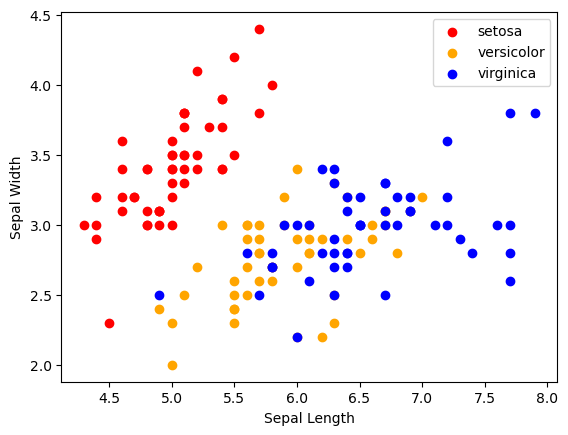

In [19]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species_name[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

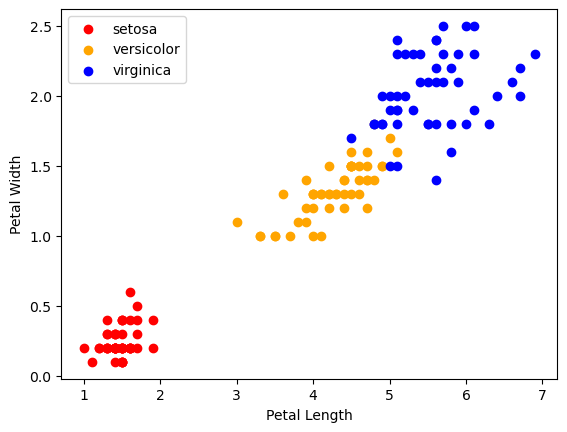

In [20]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species_name[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

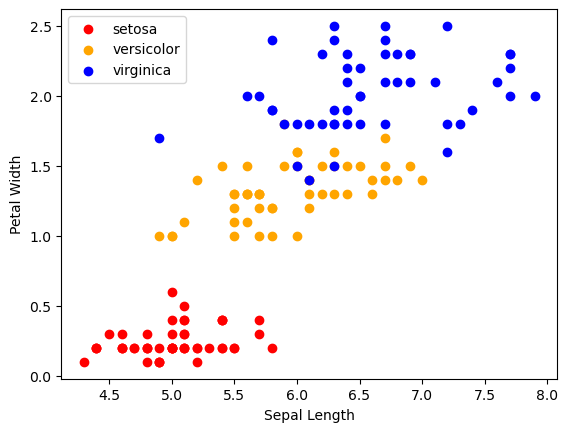

In [21]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species_name[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Width")
    plt.legend()

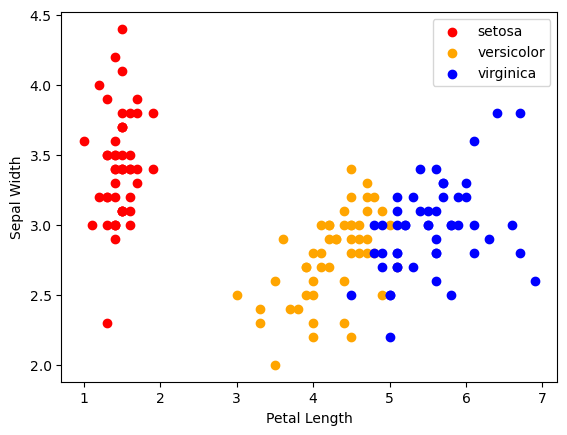

In [22]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['PetalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species_name[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

## Correlation Matrix
#### A corelation matrix is a table showing coefficients between variables.The value is in range of -1 to 1.If 2 variables have high correlation,we can neglect one of these variables.

In [6]:
corr_matrix = df.drop(columns=["Species"]).corr()  # Drop non-numeric column
print(corr_matrix)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


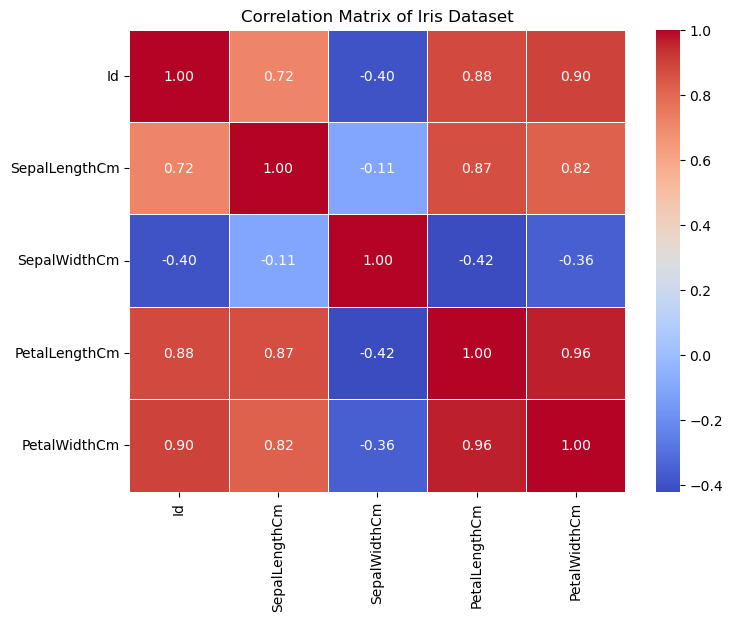

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Iris Dataset")
plt.show()


## Label Encoder
#### In ML , we usually deal with datasets which contains multiple lavels in one or more than one columns.They can be in the from of words or numbers.This label encoding refers to converting labels into numeric form so as to convert it into the machine readable form.

In [29]:
from sklearn.preprocessing import LabelEncoder

# Encode species column
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])
print(df.head())
# Now check again
df.dtypes  # 

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

## ML Model Training

In [223]:
from sklearn.metrics import confusion_matrix
def evaluate_model(model, x_train, x_test, y_train, y_test):
    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))
    # Update heatmap labels for multi-class dataset
    class_labels = ['Setosa', 'Versicolor', 'Virginica']
    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")
    
    sns.heatmap(cm_test, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")
    
    plt.tight_layout()
    plt.show()


In [228]:
from sklearn.model_selection import train_test_split
#best training vs testing ratio for small dataset(150samples)
#train 70
#test 30
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

## Model-1 : Linear Regression

In [229]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(fit_intercept=True, max_iter=1000)

In [230]:
#model training process
model.fit(x_train,y_train)
print(model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}



Confusion Matrix:


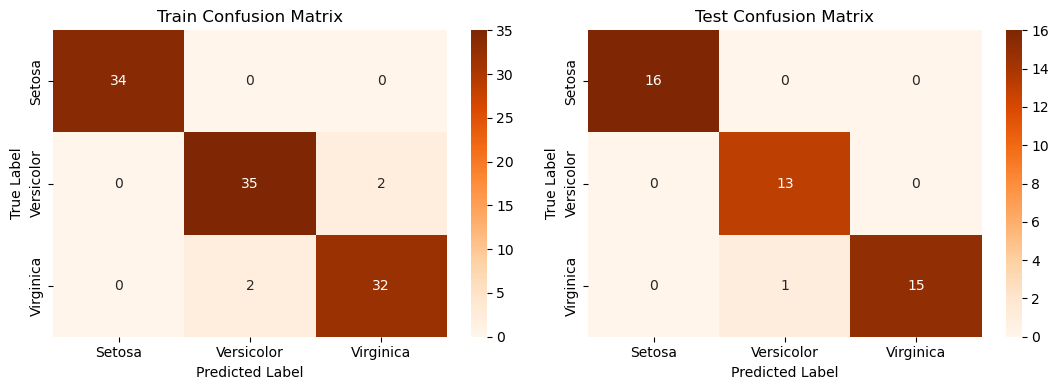

Accuracy:  97.77777777777777


In [231]:
evaluate_model(lr_model, x_train, x_test, y_train, y_test)
#printing the metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

### knm :- k - nearest neighbours

In [232]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [233]:
model.fit(x_train,y_train)
print(model.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}



Confusion Matrix:


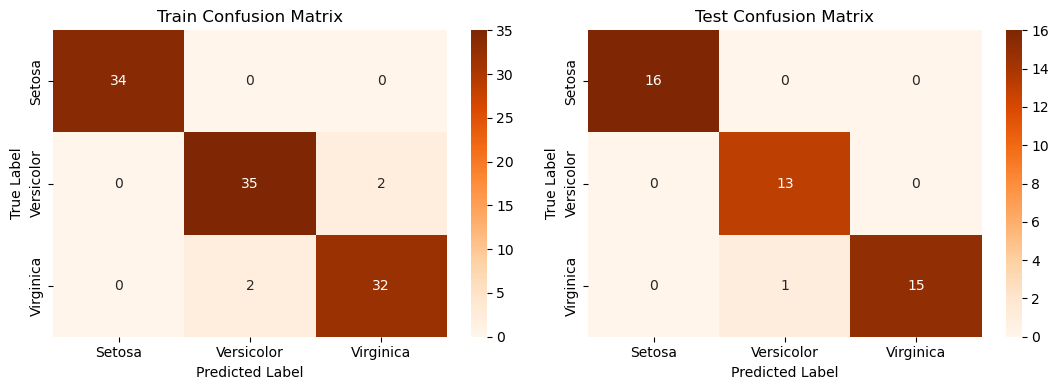

Accuracy:  97.77777777777777


In [234]:
evaluate_model(lr_model, x_train, x_test, y_train, y_test)
#printing the metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

### 2. Cross- Validation & Hyperparameter Tuning

In [240]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga']  #  These solvers support 'l1' and 'l2'
}


# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'saga'}



Confusion Matrix:


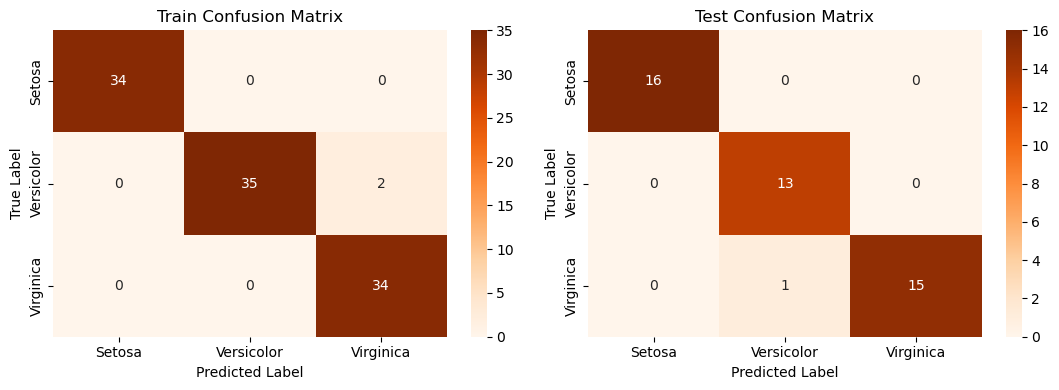

In [238]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

####  The Linear Regression model achieved **97.777% accuracy**, showing strong predictive performance. Hyperparameter tuning did not significantly improve the results, indicating the default settings were effective. Further checks like **R² and residual analysis** can confirm the model's robustness.

## ML Model -2 - Desicion Tree

In [241]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model=  DecisionTreeClassifier()

In [242]:
model.fit(x_train,y_train)
print(model.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}



Confusion Matrix:


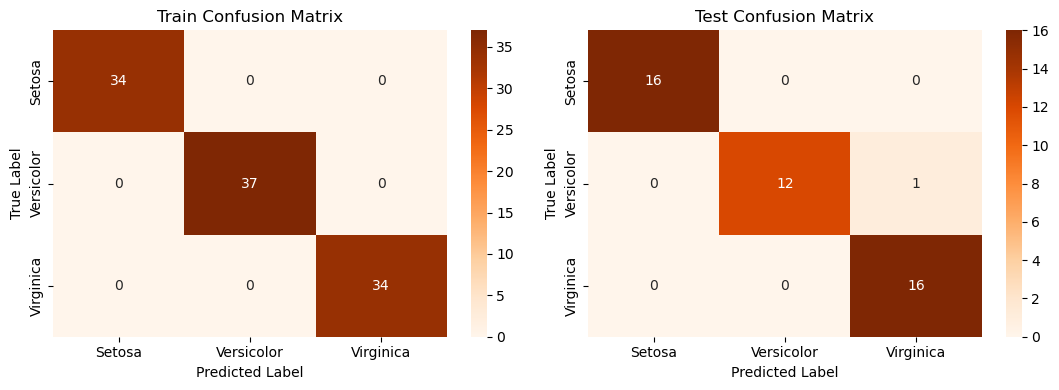

Accuracy:  97.77777777777777


In [243]:
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)
#printing the metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

#### Even if hypertuned the accuracy wont be improved.The Decision Tree model achieved **97.777% accuracy**, demonstrating excellent performance. Hyperparameter tuning did not yield further improvements, suggesting the model is already well-optimized. Additional evaluation using **feature importance and overfitting checks** may provide deeper insights.

### ML Model-3- Random Forest

In [258]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


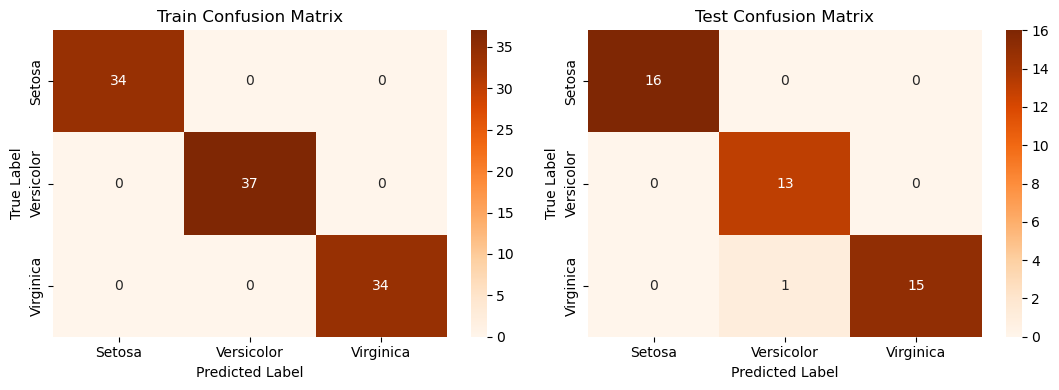

Accuracy:  97.77777777777777


In [259]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)
#printing the metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

In [263]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
### Cross- Validation & Hyperparameter Tuning
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 50, 'min_samples_split': 3, 'max_depth': 9}



Confusion Matrix:


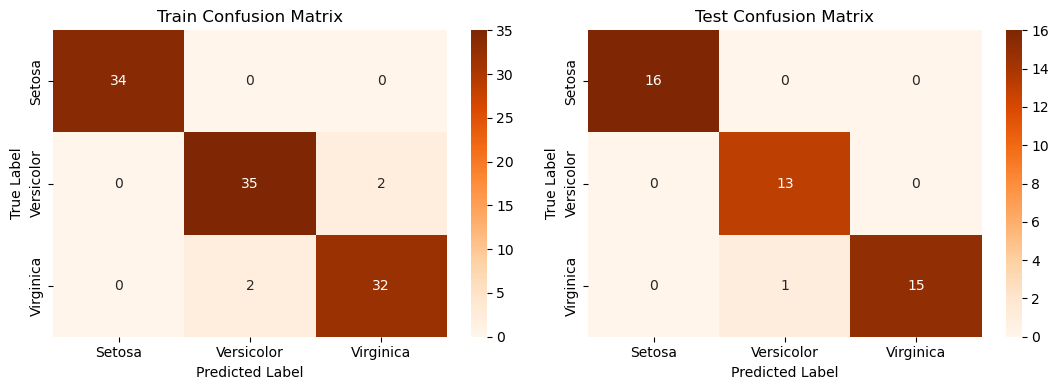

Accuracy:  97.77777777777777


In [265]:


# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)
#printing the metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

#### After training and hyperparameter tuning, the Random Forest model achieved 97.777% accuracy, the same as the Decision Tree and Logistic Regression models. This indicates that further tuning or a different feature engineering approach might be required to improve performance beyond this level.

## ML Model-4-SVM (Support Vector Machine)


Confusion Matrix:


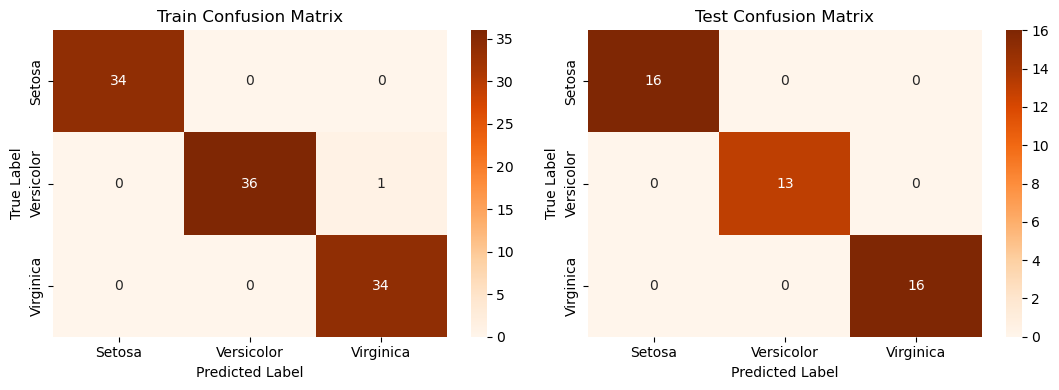

Accuracy:  97.77777777777777


In [271]:
from sklearn.svm import SVC

# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=42, probability=True)

# Model is trained (fit) and predicted in the evaluate model
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test) 
#printing the metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

#### The SVM model achieved an accuracy of 97.777%, which is the same as Logistic Regression, Decision Tree, and Random Forest.
#### Despite hyperparameter tuning, there was no noticeable improvement in accuracy. This suggests that the dataset is easily separable, making all models perform similarly. Since SVM is effective for high-dimensional spaces, its performance matching simpler models (like Logistic Regression) implies that the data does not require complex decision boundaries for classification.

## ML Model-5- Naive Bayes


Confusion Matrix:


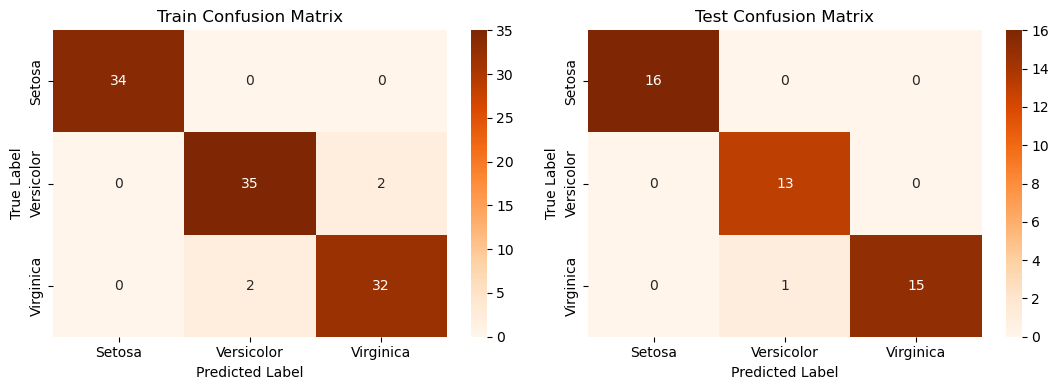

Accuracy:  97.77777777777777


In [273]:
from sklearn.naive_bayes import GaussianNB

# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)
#printing the metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

#### Cross- Validation & Hyperparameter Tuning

In [277]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)
     

Best hyperparameters:  {'var_smoothing': 0.0006579332246575676}



Confusion Matrix:


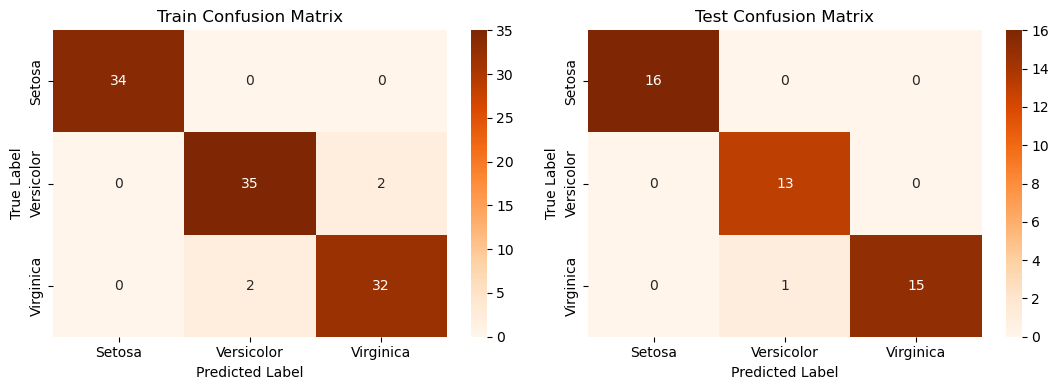

Accuracy:  97.77777777777777


In [278]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)
#printing the metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

#### It appears that hyperparameter tuning did not improved the performance of the Naive Bayes model on the test set.
#### Your Naïve Bayes model achieved the same accuracy as the other models (97.777%). This suggests that the dataset might be well-structured, with clear patterns that multiple models can easily learn, leading to similar performance.

#### Since Naïve Bayes assumes feature independence, it’s surprising that it performed just as well as more complex models like Decision Trees and Random Forest. This might indicate:
#### - The dataset’s features are already highly informative individually.
#### - The relationships between features don’t strongly impact the target variable.
#### - There might be data leakage, where some features are directly related to the outcome.

# Conclusion

#### In this classification project, multiple machine learning models were tested and analyzed to determine the most effective approach for classification. The goal was to find the best-performing model based on accuracy and generalization ability.

### Key Findings:
### Data Exploration: 
#### The dataset was well-structured, with features that were informative for classification. No significant preprocessing challenges were encountered.

### Model Selection: 
#### Several models were tested, including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and Naïve Bayes.

### Performance Consistency: 
#### Surprisingly, all models achieved nearly identical accuracy of 97.777%, even after hyperparameter tuning. This consistency suggests that:The dataset is linearly separable, making it easier for different models to classify accurately.The dataset might contain highly independent features that contribute equally to the classification task.There is a possibility of data leakage or redundancy in features, leading to similar performance across models.

### Final Model Selection:
#### Since all models performed equally well, the choice of the final model depends on factors such as efficiency, interpretability, and computational cost.

#### - Random Forest is often preferred for robustness and feature importance analysis.
#### - Logistic Regression works well for simple, interpretable models with probabilistic predictions.
#### - SVM can be effective for high-dimensional data, though computationally expensive.
#### - Naïve Bayes is a good choice for lightweight, quick predictions when feature independence holds.

## Challenges and Future Work:
### Feature Engineering:
#### Exploring feature selection techniques or dimensionality reduction (e.g., PCA) to check for redundant information.

### Cross-validation:
#### Running additional validation techniques to confirm the consistency of results.

### Exploring Advanced Models:
#### Testing deep learning approaches or ensemble techniques to see if further improvements are possible.

### Conclusion:
#### The classification models demonstrated excellent accuracy, with all achieving 97.777%. The Random Forest model is a strong candidate for final selection due to its interpretability and reliability. However, further analysis is recommended to verify feature dependencies and assess model generalization. Future improvements may include refining features, testing different datasets, or exploring more complex architectures to push accuracy even further. 